# Part II - Ford Go Bike Trip Data
## by Mustafe Abdulahi

## Investigation Overview
> In this project investigation, my aim is to create a meaningful key insights from the data we have and perform Exploratory Data Analysis. I am mainly focusing on the frequencies by hours of the day, days of the week and customer type. I want know when most trips occur or take place, what hours of the day, days of the week, and which user types made on these trips and how these variable relate to each other.


## Dataset Overview
> This data set contains a single csv file and consists of information about individual bike-sharing system covering the greater San Francisco Bay area. The data features include tripduration (secs), start_time, end_time, user information i.e (user_type, age), and some other variable.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from datetime import datetime
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
df_cleaned = pd.read_csv("fordgobiketrip_cleaned_data.csv")
df_cleaned.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,end_day,start_hour,end_hour,start_month,end_month,dur_per_minute,age_group,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Customer,1984.0,Male,No,Thursday,Friday,17,8,February,March,869.750000,Adult,38.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,Customer,NaN,NaN,No,Thursday,Friday,18,6,February,March,708.683333,NaN,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Customer,1972.0,Male,No,Thursday,Friday,12,5,February,March,1030.900000,Adult,50.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Subscriber,1989.0,Other,No,Thursday,Friday,17,4,February,March,608.166667,Adult,33.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Subscriber,1974.0,Male,Yes,Thursday,Friday,23,0,February,March,26.416667,Adult,48.0


In [3]:
base_color = sb.color_palette()[1]

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### Distribution of Trip Ride Duration

The original trip duration in the data was was measured in Seconds, so transformed into minutes plotted in the Exploratory section in part I and found there was a long tail of duration distribution, so I have applied to logarithmic scale transformation to see the average trip duration. As we in the histogram, most rides took about (8-12) minutes. And very few rides lasted more than an one hour (60 minutes). We also checked the trip avearge duration which is 12 minutes.

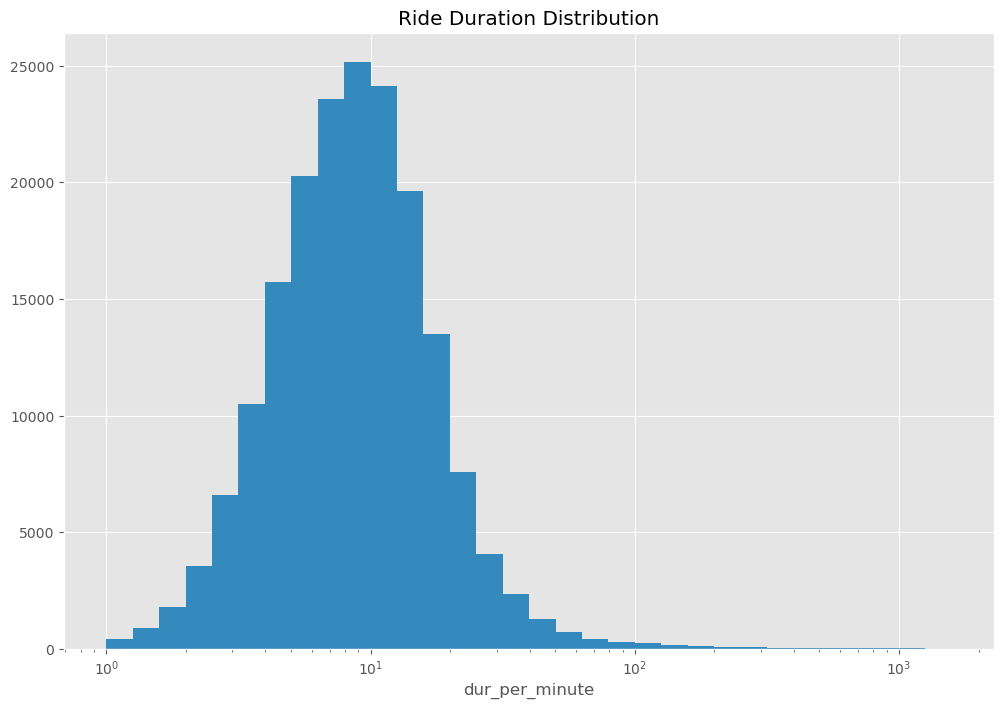

In [4]:
def histogram():
    plt.figure(figsize=[12,8])
    bin_edges = 10 ** np.arange(0.0, np.log10(df_cleaned.dur_per_minute.max())+0.1, 0.1)
    plt.hist(data = df_cleaned, x = 'dur_per_minute', bins = bin_edges, color=base_color)
    plt.xscale('log')
    plt.title("Ride Duration Distribution");
    plt.xlabel('dur_per_minute');

histogram()

In [5]:
# check the average trip duratons
df_cleaned['dur_per_minute'].mean()

12.10130725724969

### Distribution of rides per hour


Most trips were taken at 8th,9th,17th,and 18th hour. From this insight we can infere that this is because people going work to between 8-9 hr (morning) and is coming back from work to home at 17-18 hour which is closing work.

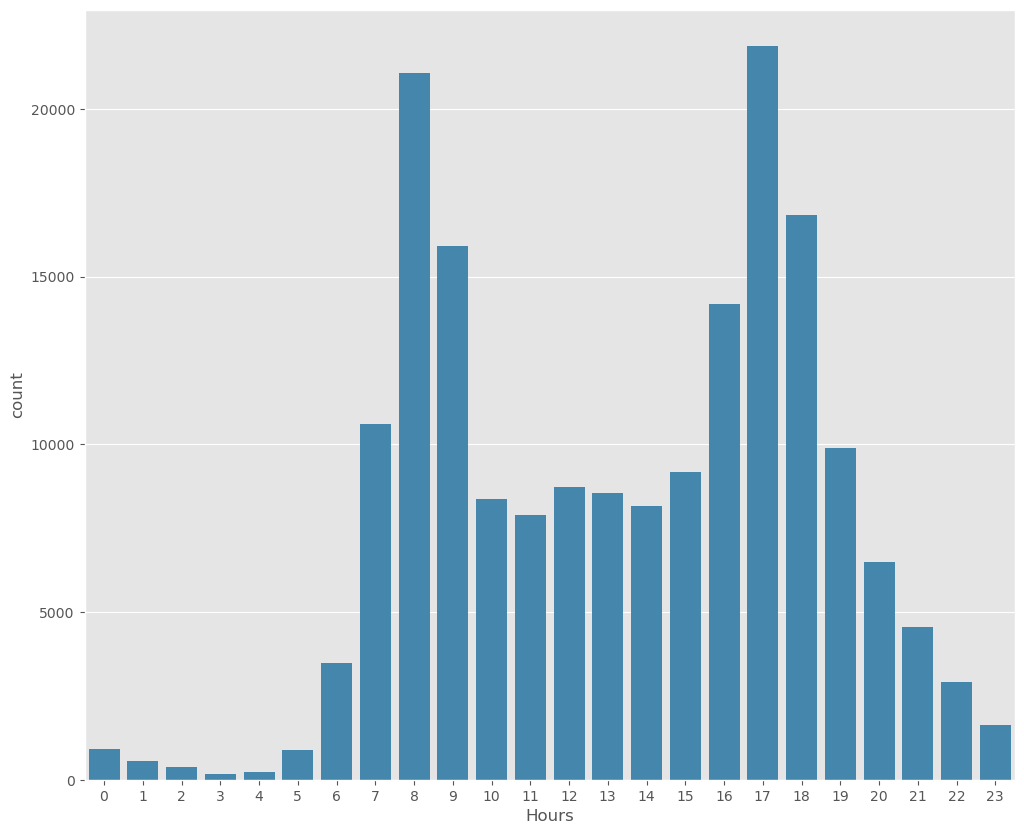

In [6]:
# let take a look at the trip duration per hour frequence
plt.figure(figsize=(12, 10))
sb.countplot(data= df_cleaned,
            x=df_cleaned['start_hour'].sort_values(ascending=True),
            color=base_color)
plt.xlabel('Hours');

## Trip ride frequence per day

Most of the trips were taken (start and end days) on weekends, It looks like it pretty consistance during the weekdays.

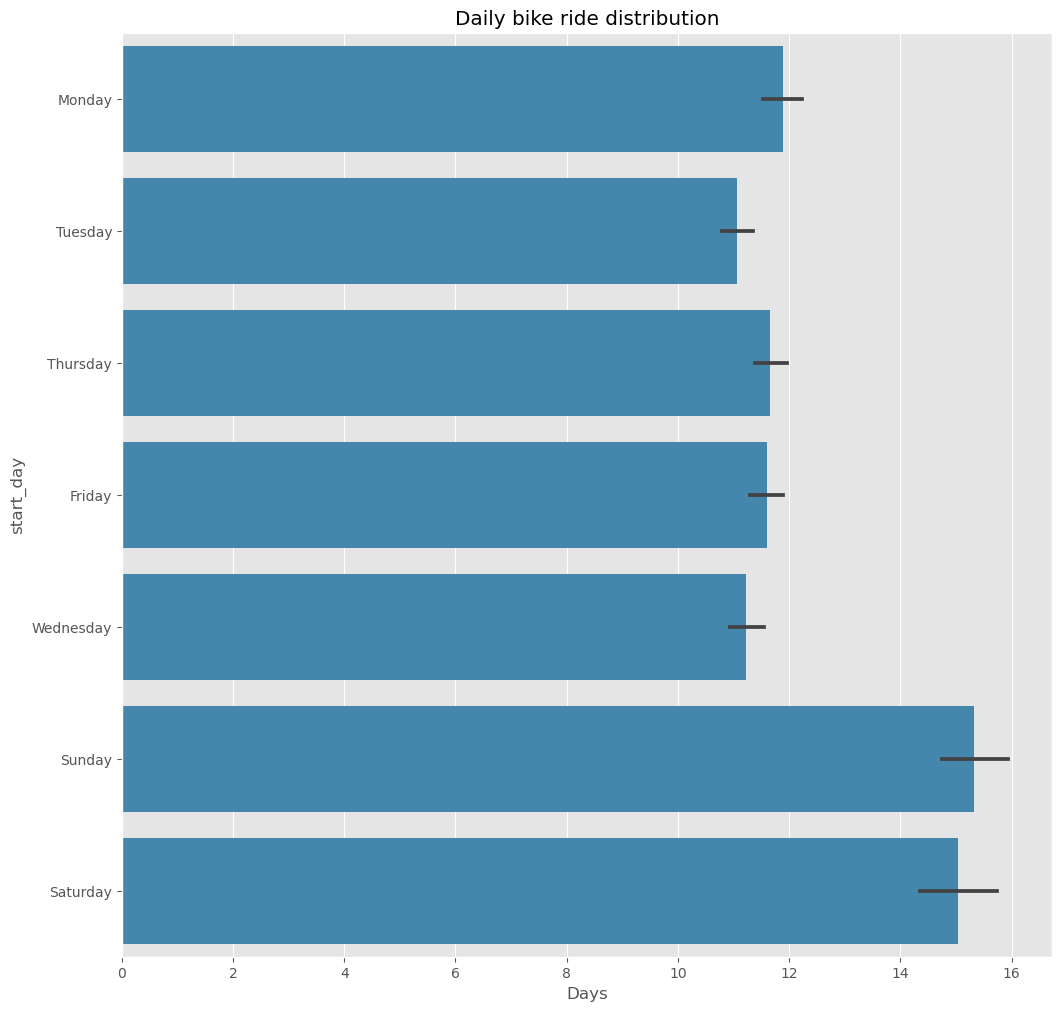

In [7]:
# let take a look at the trip duration per day frequence
def horizontal_bar():
    plt.figure(figsize=(12, 12))
    myplot=sb.barplot(y='start_day',x= 'dur_per_minute',
                      data=df_cleaned.sort_values(by=['dur_per_minute'],ascending=True ),
                      color=base_color)
    plt.title("Daily bike ride distribution")
    plt.xlabel("Minutes")
    plt.xlabel("Days")
    
horizontal_bar()

### Relationship Between Age and Duration Per Minute Distribution
In the firs scatter plot figure(1), we notice as the age incresed the trip duration is inversaly decreasing so I plotted an other scatterplot (relplot) figure(2) to look more closely the relationship between age and duration. Unfortunately I found that age doesn't seem to have a good relatioship with duration because the regression is so close to the horizantal which indicates no relationship.

<Figure size 1200x800 with 0 Axes>

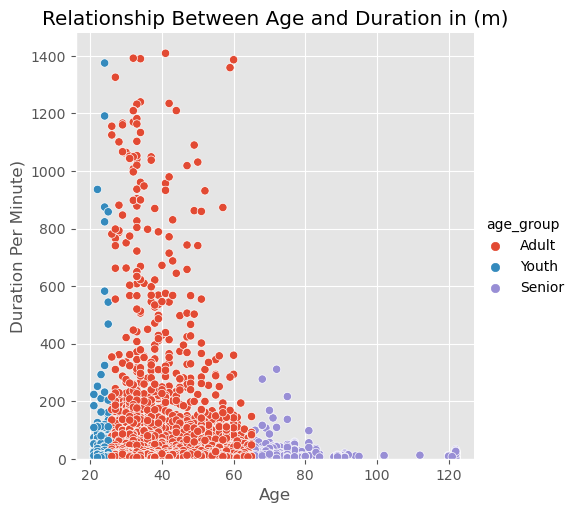

In [8]:
# lets look the relationship more closely by coloring age group category to the relationship
plt.figure(figsize=(12,8))
sb.relplot(x="age", y="dur_per_minute", hue="age_group", data=df_cleaned)
plt.ylim(0)
plt.title("Relationship Between Age and Duration in (m)")
plt.xlabel("Age")
plt.ylabel("Duration Per Minute)");

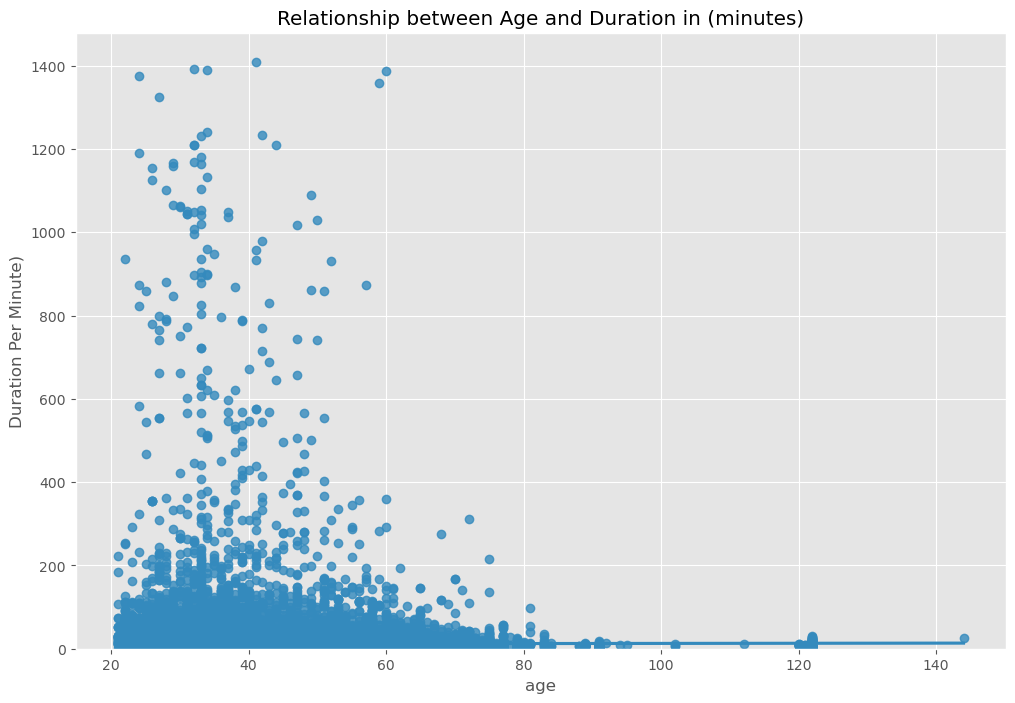

In [9]:
plt.figure(figsize =(12,8))
regplot = sb.regplot(x="age", y="dur_per_minute", data=df_cleaned,color= base_color)
plt.ylim(0)
plt.title("Relationship between Age and Duration in (minutes)")
plt.ylabel("Duration Per Minute)");

####  Distribution of Gender Trip Duration
 The distribution shows that Females and Other genders take longer trip durations then Male which was surprising to me.

Text(0.5, 0, 'Days')

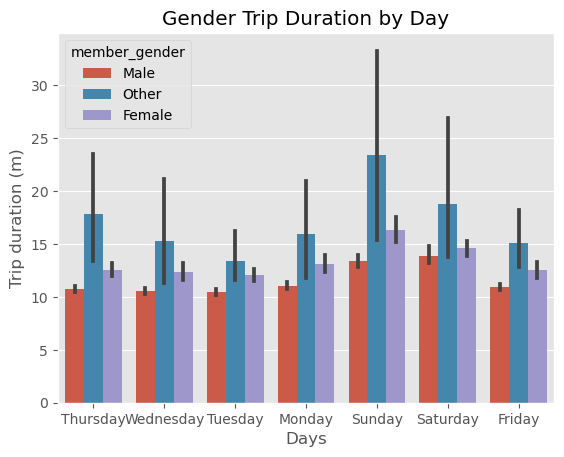

In [10]:
# show which genre takes the longest trip
# Compare daily trip duration by gender
sb.barplot(x="start_day", y="dur_per_minute",
             hue="member_gender",
             data=df_cleaned)
plt.title('Gender Trip Duration by Day')
plt.ylabel('Trip duration (m)')
plt.xlabel('Days')

### User Type Distribution Duration across all the genders
- In my observation for `Customer Type users`, I found that the females take longer trips, followed by male.
- On the other for `Subscribers` we found that females and other gender duration is very close  , but the male duration is less compared female and other gender. In conclusion from this visual, we can deduce females take longer trips than any other gender.

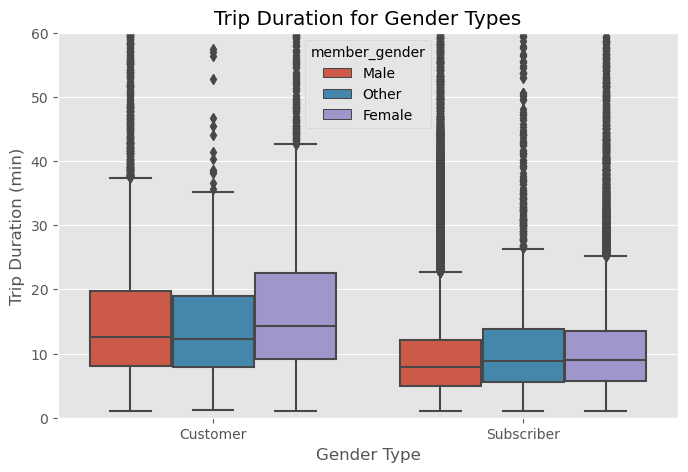

In [11]:
# Let look at Duration across all the genders
plt.figure(figsize = [8, 5])
sb.boxplot(x='user_type', y='dur_per_minute', data = df_cleaned, hue="member_gender")
plt.ylim(0, 60)
plt.title('Trip Duration for Gender Types')
plt.xlabel('Gender Type')
plt.ylabel('Trip Duration (min)');

## Summery and Conclusions
 - The data contains information about individual bike-sharing system covering the greater San Francisco Bay area.
 - The average trips is about 12 Minute long, the most trips are between 8-12 minute.
 - people start their trips between 8th, 9th and end 17th and 18th o'clock. start and closing work hours.
 - Most trips were taken (start and end days) on weekends, It looks like it pretty consistance during the weekdays.
 - As age increases trip duration decreases
 - Customer user type trips take a longer duration compared to subscribers.
 - Female gender take longer trips than other genders

## Limitations

Chosing the right visualization was the hardest in this project for me, I was using python 3.6 in my Udacity work space, so I felt I have very limited graphs visualization in my seaborn library, I was not able to updates latest version of seaborn, so I have been missing most of the recent seaborn plots like (Catplot, scatterplot and many more), Also time was not my best friend for the past couble months I work 12-13 hrs shift,so I believed if I would have spent more time I would have done better, I am sure this analysis is not 100% guarenteed to be proof error solution.


### Sources

https://seaborn.pydata.org/generated/seaborn.regplot.html
https://stackoverflow.com/questions/55104819/display-count-on-top-of-seaborn-barplot
https://seaborn.pydata.org/generated/seaborn.boxplot.html
https://seaborn.pydata.org/generated/seaborn.countplot.html
https://stackoverflow.com/questions/26597116/seaborn-plots-not-showing-up
https://deepnote.com/@dain-russell/bike-exploration-328b5ba1-25e4-4a35-aaad-e70146c9e182


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [12]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

zsh:1: no such file or directory: Part_II_Filename


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
